# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following function may be useful for loading the necessary data.

In [2]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

# Helper Functions

In [3]:
# normalizes the test and training data
def normalize(filename):
    # loads data into arrays
    data = load_data(filename)
    test = load_data('data/wine_testing.txt')

    x = []
    y = []
    for i in data:
        y.append(i[0])
        x.append([1,i[1],i[2],i[3],i[4],i[5],i[6],i[7],i[8],i[9],i[10],i[11],i[12],i[13]])

    xtest = []
    ytest = []
    for q in test:
        ytest.append(q[0])
        xtest.append([1,q[1],q[2],q[3],q[4],q[5],q[6],q[7],q[8],q[9],q[10],q[11],q[12],q[13]])
        
    #takes mean and std and normalizes each part of x
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)

    for j in range(len(x)):
        for k in range(1, len(x[0])):
            x[j][k] = (x[j][k] - mean[k])/std[k]
            
    for p in range(len(xtest)):
        for l in range(1, len(xtest[0])):
            xtest[p][l] = (xtest[p][l] - mean[l])/std[l]
        
    return np.array(x),np.array(y),np.array(xtest),np.array(ytest)

# different weights for l2 regularization
def values():
    lambdav = [0.00001]
    
    for i in range(14):
        lambdav.append(lambdav[i] * 5)
        
    return lambdav

# calculates the l2norm
def l2norm(weight):
    return np.sqrt(np.matmul(np.transpose(weight), weight))

# shuffles the points
def shuffle(x, y):
    x2 = []
    y2 = []
    index = []
    
    for i in range(len(x)):
        index.append(i)
        
    np.random.shuffle(index)
    
    for k in index:
        x2.append(x[k])
        y2.append(y[k])
        
    return np.array(x2),np.array(y2)
    
# initializes the weights
def weightstart(length):
    w = []
    for i in range(length):
        w.append(np.random.randint(9, size=1)[0] / 100)
        
    return np.array(w)


# SGD Functions

In [4]:
def loss(X, Y, w, lam):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    loss = 0
    for i in range(len(X)):
        loss += (np.log(1 / (1 + np.e**(-Y[i] * np.dot(w, X[i])))))
    return (-loss / len(X))
    

def gradient(x, y, w, lam, tot):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    return (((-y * x) / (np.e**(y * np.dot(w, x)) + 1)) + (2 * lam / tot) * w)
    

def SGD(X, Y, w_start, eta, N_epochs, lam):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    w = np.copy(w_start)
    
    for i in range(N_epochs):
        X,Y = shuffle(X,Y)
        for j in range(len(X)):
            w = np.add(-eta * gradient(X[j], Y[j], w, lam, len(X)), w)
        
    return w

# Main Code

<function matplotlib.pyplot.show(*args, **kw)>

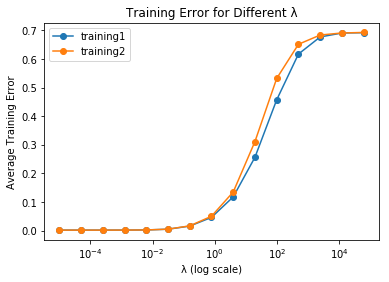

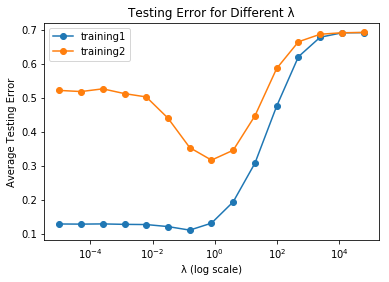

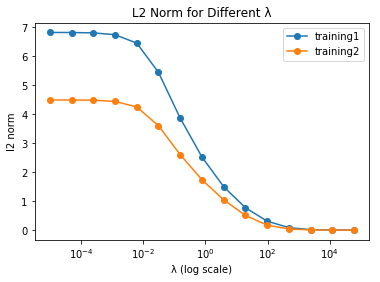

In [8]:
epochs = 20000
learningrate = 0.0005
lambdavalue = values()
training = []
training2 = []
testing = []
testing2 = []
lnorm = []
lnorm2 = []
legendz = ["training1", "training2"]
    
for i in lambdavalue:
    # gets data for wine_training1.txt
    x, y, xtest, ytest = normalize("data/wine_training1.txt")
    # gets initial weights
    w = weightstart(len(x[0]))
    # trains
    w = SGD(x,y,w,learningrate,epochs,i)
    # records errors and l2norm
    training.append(loss(x,y,w,i))
    testing.append(loss(xtest,ytest,w,i))
    lnorm.append(l2norm(w))
    
    # gets data for wine_training2.txt
    x2, y2, xtest2, ytest2 = normalize("data/wine_training2.txt")
    # gets initial weights
    w2 = weightstart(len(x2[0]))
    # trains
    w2 = SGD(x2,y2,w2,learningrate,epochs,i)
    # records errors and l2norm
    training2.append(loss(x2,y2,w2,i))
    testing2.append(loss(xtest2,ytest2,w2,i))
    lnorm2.append(l2norm(w2))

# make each of the three plots
plt.figure()
plt.plot(lambdavalue, training, '-o')
plt.plot(lambdavalue, training2, '-o')
plt.legend(legendz, loc = 'best')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Average Training Error')
plt.title('Training Error for Different λ')
plt.show

plt.figure()
plt.plot(lambdavalue, testing, '-o')
plt.plot(lambdavalue, testing2, '-o')
plt.legend(legendz, loc = 'best')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Average Testing Error')
plt.title('Testing Error for Different λ')
plt.show

plt.figure()
plt.plot(lambdavalue, lnorm, '-o')
plt.plot(lambdavalue, lnorm2, '-o')
plt.legend(legendz, loc = 'best')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('l2 norm')
plt.title('L2 Norm for Different λ')
plt.show